Shreyas Ravi
DSC 478
Assignment 2

In [32]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,800))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine
#         classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [7]:
# Question 1 (a)
import pandas as pd
train_m = pd.read_csv('trainMatrixModified.txt', sep='\t', header=None)
test_m = pd.read_csv('testMatrixModified.txt', sep='\t', header=None)
test_m.shape

(5500, 200)

In [118]:
train_m.shape

(5500, 800)

In [84]:
test_cl.drop(columns=[0],axis=1,inplace=True)

In [67]:
from numpy import *
import numpy as np
import operator

In [10]:
test_cl = pd.read_csv('testClasses.txt', sep='\t', header=None)
train_cl = pd.read_csv('trainClasses.txt', sep='\t', header=None)
test_cl.shape
train_cl.shape

(800, 2)

In [12]:
mod_t = pd.read_csv('modifiedterms.txt', sep='\t', header=None)
mod_t.shape

(5500, 1)

In [394]:
def classify(inX, dataSet, labels, k, dist='Euclidean'):  
    sortedDistIndicies = distance(dist=dist, inX=inX, dataSet=dataSet)
#     print(sortedDistIndicies)
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        print(voteIlabel)
#         print(voteIlabel[1])
        classCount[voteIlabel[0]] = classCount.get(voteIlabel[0],0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [395]:
def distance(dist, inX, dataSet):
    if dist=='Euclidean':
        dataSetSize = dataSet.shape[0]
        diffMat = tile(inX,(dataSetSize,1)) - dataSet
#         print(diffMat.shape)
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
#         print(sqDistances.shape)
        distances = sqDistances**0.5
#         print(distances.argsort())
        return distances.argsort()
    if dist=='Cosine':
        D_norm = array([linalg.norm(dataSet[i]) for i in range(len(dataSet))])
        x_norm = linalg.norm(inX)
        cosines = dot(dataSet,inX)/(D_norm * x_norm)
        distances = 1 - cosines
        return distances.argsort()

In [295]:
classify(test_m.iloc[:,150].to_numpy(), train_m.to_numpy().T, train_cl.to_numpy(),k=799)

0

In [296]:
test_cl.shape

(200, 1)

In [297]:
test_m.shape

(5500, 200)

In [298]:
# Question 1(b)
def evaluation(test_m, test_labels,dataSet, labels, k, dist='Euclidean'):
    size = test_labels[1].shape[0]
    counter = 0
    for i in range(size):
        if classify(test_m.iloc[:,i].to_numpy(), dataSet.to_numpy().T, labels.to_numpy(),k, dist=dist) == test_labels[1][i]:
            counter = counter+1
    return float(counter)/ size

In [299]:
evaluation(test_m, test_cl, train_m, train_cl, k=21)

0.735

In [300]:
# Question 1(c)
val_of_k = list(range(5, 101, 5))

In [301]:
euclidean = []
cosine = []
for i in val_of_k:
    euclidean.append(evaluation(test_m, test_cl, train_m, train_cl, k=i))
    cosine.append(evaluation(test_m, test_cl, train_m, train_cl, k=i, dist='Cosine'))    

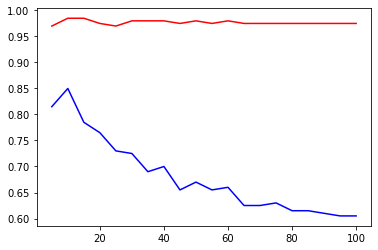

In [302]:
import matplotlib.pyplot as plt 
plt.plot(val_of_k, euclidean,
     label = "Euclidean", color = 'b')
plt.plot(val_of_k, cosine,
     label = "Cosine", color = 'r')

In [303]:
# Question 1(d)
# define a function that would calculate IDF (from tf IDF)
def inverse_docf(dataset):
    N=dataset.shape[1]
    nk=np.count_nonzero(dataset, axis=1) # axis = 1 -> only counts column sum
    return np.log(N/nk) 

In [304]:
train_m_tfidf = inverse_docf(train_m).reshape(train_m.shape[0],1)*train_m
test_m_tfidf = inverse_docf(test_m).reshape(test_m.shape[0],1)*test_m

/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_41241/545761093.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(N/nk)


In [305]:
cosine_tfidf = []
for i in val_of_k:
    cosine_tfidf.append(evaluation(test_m_tfidf, test_cl, train_m_tfidf, train_cl, k=i, dist='Cosine'))    

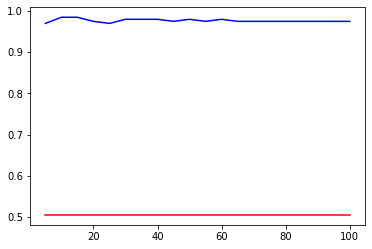

In [306]:
plt.plot(val_of_k, cosine,
     label = "Cosine", color = 'b')
plt.plot(val_of_k, cosine_tfidf,
     label = "Cosine TFIDF", color = 'r')

From the look of this graph we see that the TFIDF does not seem to be working properly. KNN does not work better with tdidf. 

In [ ]:
# Question 1(e)
# create 1 function converts training matrix to another centroid matrix (should be given in theory)
# call previous functions to get output - evaluation

In [387]:
def train_rocchio(train_m, labels):
    unique_labels = np.unique(labels)
    centroid = np.empty([train_m.shape[0],len(unique_labels)])
    for i in unique_labels:
        doc_index = np.where(np.all(train_cl==i,axis=1))[0]
        centroid[:,i] = train_m[:,doc_index].reshape([train_m.shape[0],doc_index.shape[0]]).mean(axis=1)
    return centroid, unique_labels

In [409]:
def rocchio_method(inX, dataSet, labels):
    dataSet,labels = train_rocchio(dataSet, labels)
    D_norm = array([linalg.norm(dataSet.T[i]) for i in range(len(dataSet.T))])
    x_norm = linalg.norm(inX)
    cosines = dot(dataSet.T,inX)/(D_norm * x_norm)
    distances = 1 - cosines
    sortedDistIndicies = distances.argsort()     
    return distances[sortedDistIndicies[0]], labels[sortedDistIndicies[0]]

In [410]:
rocchio_method(test_m.iloc[:,150].to_numpy(), train_m.to_numpy(), train_cl.to_numpy())

(0.5891382266531727, 1)

In [414]:
def evaluation(test_m, test_labels,dataSet, labels):
    size = test_labels[1].shape[0]
    counter = 0
    for i in range(size):
        if rocchio_method(test_m.iloc[:,i].to_numpy(), dataSet.to_numpy(), labels.to_numpy())[1] == test_labels[1][i]:
            counter = counter+1
    return float(counter)/ size

In [416]:
evaluation(test_m, test_cl, train_m, train_cl)

0.975

Comparing this evaluation the best outcomes achieved using Cosine distances for KNN (which would be 0.98) we can see that they are quite close to each other as opposed to the best evaluation outcome using Euclidean distances for KNN (which would be at 0.86) which seems further away from the evaluation outcome of the rocchio method. 

In [137]:
# Question 1(f)
train_cl.drop(columns=[0],axis=1,inplace=True)

In [138]:
# from sklearn.neighbors import NearestCentroid

In [140]:
X=train_m.T
y=train_cl
clf = NearestCentroid()
clf.fit(X, y)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


NearestCentroid()

In [145]:
from sklearn import metrics

In [146]:
pred = clf.predict(test_m.T)
metrics.accuracy_score(y_true = test_cl, y_pred = pred)

0.94

In [149]:
# Question 2(a)
a_mod = pd.read_csv('adult-modified1.csv')
a_mod.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [153]:
a_mod_dummies = pd.get_dummies(a_mod)
a_mod_dummies.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [154]:
a_mod_dummies.drop(columns=['income_<=50K'],axis=1,inplace=True)
y=a_mod_dummies['income_>50K']
a_mod_dummies.drop(columns=['income_>50K'],axis=1,inplace=True)

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a_mod_dummies, y, test_size=0.2)

In [161]:
# Question 2(b(i))
from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler = MinMaxScaler()
min_max_norm = scaler.fit(x_train, y_train)
min_max_norm = scaler.transform(x_train)

In [177]:
min_max_norm[:5,:]

array([[0.09589041, 0.53333333, 0.29591837, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.4109589 , 0.53333333, 0.55102041, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.39726027, 0.86666667, 0.43877551, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.2739726 , 0.53333333, 0.44897959, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.35616438, 0.8       , 0.39795918, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 

In [186]:
min_max_test = scaler.transform(x_test)

In [187]:
min_max_test[:5,:]

array([[0.35616438, 0.6       , 0.39795918, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.54794521, 0.53333333, 0.37755102, 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.12328767, 0.6       , 0.39795918, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.53424658, 0.4       , 0.39795918, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.47945205, 0.53333333, 0.39795918, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(min_max_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [189]:
knn_pred = knn.predict(min_max_norm)
metrics.accuracy_score(y_true = y_train, y_pred = knn_pred)

0.8394209058307877

In [190]:
knn_pred_test = knn.predict(min_max_test)
metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test)

0.7934147636749868

The accuracy of the testing is almost 5% lower than that of the training which means there is a presence of overfitting, considering this large difference in accuracy between train and test.

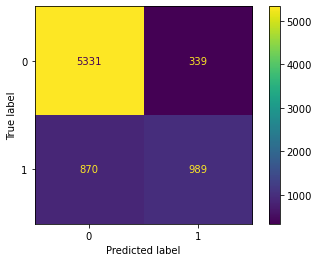

In [203]:
# from sklearn.metrics import confusion_matrix
# confusion matrix for train
conf_train = confusion_matrix(y_train, knn_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, min_max_norm, y_train)
plt.show()

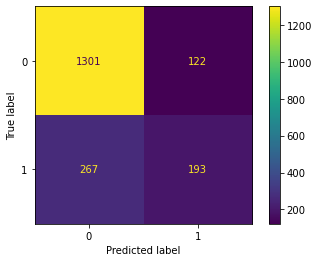

In [204]:
# confusion matrix for test
confusion_matrix(y_test, knn_pred_test)
plot_confusion_matrix(knn, min_max_test, y_test)
plt.show()

In [197]:
# from sklearn.metrics import classification_report
print(classification_report(y_train, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5670
           1       0.74      0.53      0.62      1859

    accuracy                           0.84      7529
   macro avg       0.80      0.74      0.76      7529
weighted avg       0.83      0.84      0.83      7529



In [198]:
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1423
           1       0.61      0.42      0.50       460

    accuracy                           0.79      1883
   macro avg       0.72      0.67      0.68      1883
weighted avg       0.78      0.79      0.78      1883



In [205]:
# Question 2(b(ii))
# fitting knn with distance weights and k=5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(min_max_norm, y_train)

KNeighborsClassifier(weights='distance')

In [206]:
knn_pred_test = knn.predict(min_max_test)
metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test)

0.7742963356346256

Decreasing the neighbors to 5 and using distance weights did not improve the accuracy. I will now be trying the same but with uniform distance instead to see which one provides a higher accuracy.

In [208]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(min_max_norm, y_train)
knn_pred_test = knn.predict(min_max_test
metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test)

0.7817312798725438

Using uniform weights increases the accuracy ever-so-slightly however it is still less than the original accuracy i calculated earlier. I will now try changing the number of neighbors to 10 with distance weights and compare it to the accuracy we previously recieved without any specified weights. 

In [209]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(min_max_norm, y_train)
knn_pred_test = knn.predict(min_max_test)
metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test)

0.7843866171003717

This accuracy is still slightly lower than the original one we calculated when the no. of neighbors was = 10
Below i have written a for loop to test all the values of k between 10 and 101 with uniform weights. I will then pick the highest accuracy among all of them and test that with distance weights. 

In [218]:
uniform = []
for i in range(5, 101, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(min_max_norm, y_train)
    knn_pred_test = knn.predict(min_max_test)
    print('accuracy for', i, '=', metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test))
    uniform.append(metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test))

    

accuracy for 5 = 0.7817312798725438
accuracy for 10 = 0.7934147636749868
accuracy for 15 = 0.8040361125862985
accuracy for 20 = 0.8024429102496017
accuracy for 25 = 0.8061603823685608
accuracy for 30 = 0.8056293149229952
accuracy for 35 = 0.8082846521508231
accuracy for 40 = 0.8088157195963888
accuracy for 45 = 0.807222517259692
accuracy for 50 = 0.8098778544875199
accuracy for 55 = 0.8082846521508231
accuracy for 60 = 0.8056293149229952
accuracy for 65 = 0.8008497079129049
accuracy for 70 = 0.8019118428040362
accuracy for 75 = 0.8019118428040362
accuracy for 80 = 0.804567180031864
accuracy for 85 = 0.8061603823685608
accuracy for 90 = 0.8056293149229952
accuracy for 95 = 0.804567180031864
accuracy for 100 = 0.8019118428040362


In [219]:
distances = []
for i in range(5, 101, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(min_max_norm, y_train)
    knn_pred_test = knn.predict(min_max_test)
    print('accuracy for', i, '=', metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test))
    distances.append(metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test))

accuracy for 5 = 0.7742963356346256
accuracy for 10 = 0.7843866171003717
accuracy for 15 = 0.7812002124269782
accuracy for 20 = 0.7843866171003717
accuracy for 25 = 0.7870419543281997
accuracy for 30 = 0.782793414763675
accuracy for 35 = 0.7812002124269782
accuracy for 40 = 0.7806691449814126
accuracy for 45 = 0.7822623473181094
accuracy for 50 = 0.7817312798725438
accuracy for 55 = 0.7796070100902814
accuracy for 60 = 0.7806691449814126
accuracy for 65 = 0.7817312798725438
accuracy for 70 = 0.7833244822092406
accuracy for 75 = 0.7859798194370685
accuracy for 80 = 0.7854487519915029
accuracy for 85 = 0.7843866171003717
accuracy for 90 = 0.7859798194370685
accuracy for 95 = 0.7870419543281997
accuracy for 100 = 0.7859798194370685


Above, we can see that the value of K that provides the highest accuracy is K=50 with uniform weights. Comparing this to the same value of K using distance weights we see a much lower accuracy rate. Infact, when we look at the all the accuracy values from K = 5 to 100, the uniform weight accuracies are all higher than the distance weight accuracies.
This shows a decline in accuracy compared to earlier when we used uniform distances. This is also lower than the original test accuracy we recieved when we used k=10. Therefore, the best accuracy is achieved at K=50 using uniform distances. 

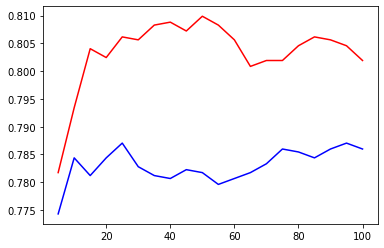

In [220]:
k_vals = list(range(5, 101, 5))
plt.plot(k_vals, distances,
     label = "Distance weights", color = 'b')
plt.plot(k_vals, uniform,
     label = "Uniform weights", color = 'r')

This plot shows what we had deciphered earlier, that distance weights have lower accuracies than uniform weights. At its highest, uniform weights have an accuracy of close to 0.81 at K=50 as opposed to distance weights having a highest accuracy of 0.787 at K=25.b

In [223]:
knn = KNeighborsClassifier(n_neighbors=50, weights='uniform')
knn.fit(min_max_norm, y_train)
knn_pred_train = knn.predict(min_max_norm)
metrics.accuracy_score(y_true = y_train, y_pred = knn_pred_train)

0.8206933191658918

In [225]:
knn_pred_test = knn.predict(min_max_test)
metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test)

0.8098778544875199

The above shows an improvement in the testing accuracy as compared to the original knn classifier which displayed a testing accuracy of 0.78

In [229]:
# Question 2(b(iii))
uniform_tr = []
uniform_ts = []
for i in range(5, 101, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(min_max_norm, y_train)
    knn_pred_train = knn.predict(min_max_norm)
    knn_pred_test = knn.predict(min_max_test)
    # print('accuracy for', i, '=', metrics.accuracy_score(y_true = y_train, y_pred = knn_pred_train))
    uniform_tr.append(metrics.accuracy_score(y_true = y_train, y_pred = knn_pred_train))
    uniform_ts.append(metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_test))

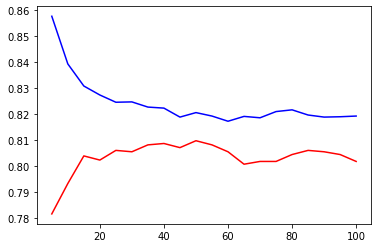

In [230]:
k_vals1 = list(range(5, 101, 5))
plt.plot(k_vals1, uniform_tr,
     label = "Training", color = 'b')
plt.plot(k_vals1, uniform_ts,
     label = "Testing", color = 'r')

In this case, the points that represent overfitting would be where the training has a much higher accuracy than testing. In this case, the points between 5 and 40 would be considered overfitting since the training accuracy is a much higher than the testing accuracy between these values of K. 

In [239]:
# Question 2(c)
from sklearn.datasets import load_iris
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
dt1_pred = dt1.predict(x_test)

In [241]:
conf_test1 = confusion_matrix(y_test, dt1_pred)
print(conf_test1)

[[1219  204]
 [ 240  220]]


In [242]:
print(classification_report(y_test, dt1_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1423
           1       0.52      0.48      0.50       460

    accuracy                           0.76      1883
   macro avg       0.68      0.67      0.67      1883
weighted avg       0.76      0.76      0.76      1883



In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt1_pred)
# testing accuracy

0.7642060541688794

In [246]:
dt1_pred1 = dt1.predict(x_train)
accuracy_score(y_train, dt1_pred1)
# training accuracy

0.9442156992960552

With the above accuracy scores for training and testing, we can see a big difference in accuracy between the train and test scores, which means that there is a certain amount of overfitting in this case. When considering the bias-variance tradeoff this would mean that there is high variance and low bias in this model. 

In [247]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
dt2.fit(x_train, y_train)
dt2_pred = dt2.predict(x_test)

In [248]:
dt2_pred1 = dt2.predict(x_train)

In [249]:
accuracy_score(y_train, dt2_pred1) # average training accuracy score

0.8188338424757604

In [250]:
accuracy_score(y_test, dt2_pred) # average testing accuracy score 

0.8066914498141264

[Text(167.4, 195.696, 'X[6] <= 0.5\ngini = 0.372\nsamples = 7529\nvalue = [5670, 1859]'),
 Text(83.7, 152.208, 'X[1] <= 13.5\ngini = 0.122\nsamples = 3736\nvalue = [3492, 244]'),
 Text(41.85, 108.72, 'X[1] <= 12.5\ngini = 0.088\nsamples = 3510\nvalue = [3348, 162]'),
 Text(20.925, 65.232, 'X[0] <= 31.5\ngini = 0.057\nsamples = 2931\nvalue = [2845, 86]'),
 Text(10.4625, 21.744, 'gini = 0.015\nsamples = 1582\nvalue = [1570, 12]'),
 Text(31.387500000000003, 21.744, 'gini = 0.104\nsamples = 1349\nvalue = [1275, 74]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 29.5\ngini = 0.228\nsamples = 579\nvalue = [503, 76]'),
 Text(52.3125, 21.744, 'gini = 0.039\nsamples = 251\nvalue = [246, 5]'),
 Text(73.2375, 21.744, 'gini = 0.339\nsamples = 328\nvalue = [257, 71]'),
 Text(125.55000000000001, 108.72, 'X[0] <= 30.5\ngini = 0.462\nsamples = 226\nvalue = [144, 82]'),
 Text(104.625, 65.232, 'X[2] <= 62.5\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(94.16250000000001, 21.744, 'gini = 0.062\nsa

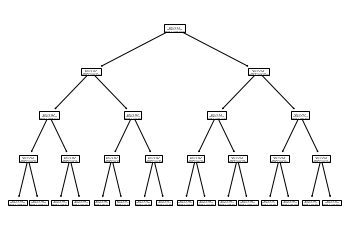

In [460]:
from sklearn import tree
tree.plot_tree(dt2)

In [430]:
#Question 2(d)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
gnb = GaussianNB()
nb_fit = gnb.fit(x_train, y_train)
nb_pred = nb_fit.predict(x_train)

In [451]:
accuracy_score(y_train, nb_pred)

0.7210784964802762

In [427]:
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(x_train, y_train)
lda_pred = lda_fit.predict(x_train)

In [452]:
accuracy_score(y_train, lda_pred)

0.8100677380794262

In [456]:
from sklearn.model_selection import KFold
cv_nb = KFold(n_splits=10, random_state=1, shuffle=True)
scores_nb = cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv=cv_nb, n_jobs=-1)
scores_nb

array([0.74236388, 0.7250996 , 0.70119522, 0.70252324, 0.76626826,
       0.7184595 , 0.69588313, 0.71447543, 0.71978752, 0.71542553])

In [457]:
scores_nb.mean()

0.7201481308807324

In [458]:
cv_lda = KFold(n_splits=10, random_state=1, shuffle=True)
scores_lda = cross_val_score(lda, x_train, y_train, scoring='accuracy', cv=cv_lda, n_jobs=-1)
scores_lda

array([0.82337317, 0.81009296, 0.79150066, 0.81938911, 0.84329349,
       0.79017264, 0.80876494, 0.79814077, 0.812749  , 0.80984043])

In [459]:
scores_lda.mean()

0.8107317185160069

Comparing the mean accuracy achieved from the 10 fold cross validation to the mean without 10 fold cross validation we see that for Naive Bayes, the accuracy goes from 0.721 without cross validation to 0.720 with cross validation which means that in this case, the accuracy has remained more or less the same. For LDA, we see the accuracy go from 0.8100 to 0.8107 (mean accuracy from 10 fold cross validation) which shows a slight increase in overall accuracy with 10 fold cross validation.  

In [462]:
nb_pred = nb_fit.predict(x_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [465]:
accuracy_score(y_test, nb_pred)

0.7174721189591078

Compared to the original training set's accuracy of 0.721, we can see that the difference between the scores for training and testing are not that far off. This means that the model is not overfitting. 

In [463]:
lda_pred = lda_fit.predict(x_test)

In [464]:
accuracy_score(y_test, lda_pred)

0.7992565055762082

Comparing this to the original LDA model training set accuracy rate of 0.810, this testing accuracy score is only slightly lower. We would however prefer the training accuracy and testing accuracy to be much closer to each other, which would show that the model is working properly and not overfitting on the training set. 